# Probability Distributions, Bayesian Probability, and Gradient Descent
## Individual Draft
### Formative Assessment 3

**Objective:**
This assignment explores:
1. Implementing probability distributions
2. Applying Bayesian probability to medical diagnosis
3. Manual and coded gradient descent implementation

## Part 1: Normal Distribution Implementation

**Problem:**
The incubation period of COVID-19 follows a normal distribution with mean (μ) = 5.1 days and standard deviation (σ) = 3 days.

**Implementation:**
We'll code the normal distribution PDF without using statistical libraries.

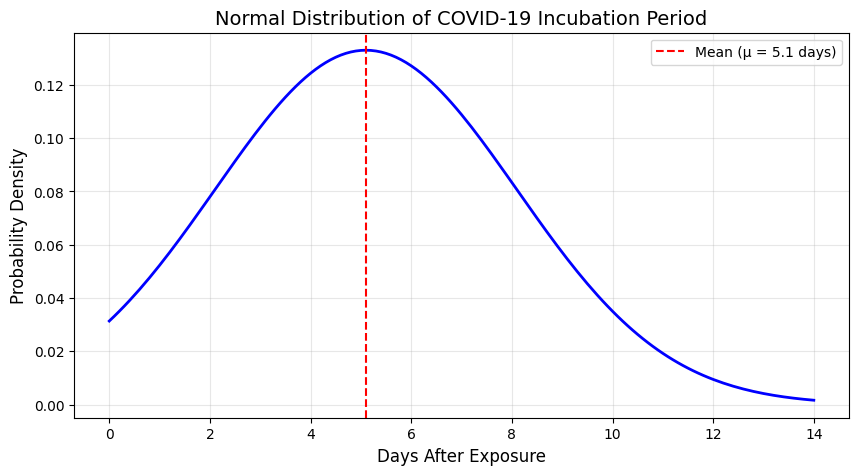

In [2]:
import math
import matplotlib.pyplot as plt
%matplotlib inline

def normal_pdf(x, mu, sigma):
    """
    Computes the probability density function (PDF) for a normal distribution
    
    Parameters:
    x (float): Input value
    mu (float): Mean of the distribution
    sigma (float): Standard deviation
    
    Returns:
    float: Probability density at x
    """
    coefficient = 1 / (sigma * math.sqrt(2 * math.pi))
    exponent = -((x - mu) ** 2) / (2 * sigma ** 2)
    return coefficient * math.exp(exponent)

# Parameters for COVID-19 incubation
mu = 5.1  # mean in days
sigma = 3  # standard deviation in days

# Generate distribution curve
x_values = [x * 0.1 for x in range(0, 141)]  # 0 to 14 days in 0.1 increments
y_values = [normal_pdf(x, mu, sigma) for x in x_values]

# Visualization
plt.figure(figsize=(10, 5))
plt.plot(x_values, y_values, color='blue', linewidth=2)
plt.title("Normal Distribution of COVID-19 Incubation Period", fontsize=14)
plt.xlabel("Days After Exposure", fontsize=12)
plt.ylabel("Probability Density", fontsize=12)
plt.grid(True, alpha=0.3)
plt.axvline(mu, color='red', linestyle='--', label=f'Mean (μ = {mu} days)')
plt.legend()
plt.show()

**Interpretation:**
- The curve shows the probability density of symptom onset over time
- Vertical red line indicates the mean incubation period (5.1 days)
- 95% of cases fall within μ ± 2σ (5.1 ± 6 days)

## Part 2: Bayesian Probability (COVID-19 Test Accuracy)

**Scenario:**
- Disease prevalence: 2% of population
- Test sensitivity (True Positive Rate): 95%
- False Positive Rate: 4%

**Question:** What is the probability someone actually has COVID-19 if they test positive?

In [4]:
def bayes_theorem(prior, likelihood, false_positive):
    """
    Computes posterior probability using Bayes' Theorem
    
    Parameters:
    prior (float): Prior probability P(Disease)
    likelihood (float): P(Test+ | Disease)
    false_positive (float): P(Test+ | No Disease)
    
    Returns:
    float: Posterior probability P(Disease | Test+)
    """
    evidence = (likelihood * prior) + (false_positive * (1 - prior))
    return (likelihood * prior) / evidence

# Given probabilities
prevalence = 0.02       # P(Disease)
sensitivity = 0.95      # P(Test+ | Disease)
false_positive = 0.04   # P(Test+ | No Disease)

# Calculate posterior probability
post_prob = bayes_theorem(prevalence, sensitivity, false_positive)

# Display results
print(f"Prior Probability (Prevalence): {prevalence*100:.2f}%")
print(f"Test Sensitivity (True Positive Rate): {sensitivity*100:.2f}%")
print(f"False Positive Rate: {false_positive*100:.2f}%")
print("\n" + "="*50 + "\n")
print(f"Probability of having COVID-19 given positive test: {post_prob*100:.2f}%")

Prior Probability (Prevalence): 2.00%
Test Sensitivity (True Positive Rate): 95.00%
False Positive Rate: 4.00%


Probability of having COVID-19 given positive test: 32.65%


**Key Insights:**
1. Despite a positive test result, there's only a 32.65% chance of actually having COVID-19
2. This counterintuitive result comes from:
   - Low disease prevalence (2%)
   - Non-negligible false positive rate (4%)
3. Highlights the importance of considering base rates in medical testing

## Part 3 & 4: Gradient Descent Implementation

**Problem:**
Implement gradient descent to fit a linear model to the points (1,2) and (2,3)

**Approach:**
1. Manual calculation of 4 iterations (1 per group member)
2. Full implementation in Python
3. Visualization of convergence

### Manual Calculations Summary

| Iteration | m       | b       | MSE     |
|-----------|---------|---------|---------|
| 0         | 0.000   | 0.000   | 3.250   |
| 1         | 0.400   | 0.250   | 1.553   |
| 2         | 0.670   | 0.415   | 0.741   |
| 3         | 0.853   | 0.523   | 0.354   |
| 4         | 0.978   | 0.593   | 0.169   |

Final parameters after 100 iterations:
Slope (m): 1.0393
Intercept (b): 0.9364
Final MSE: 0.000420


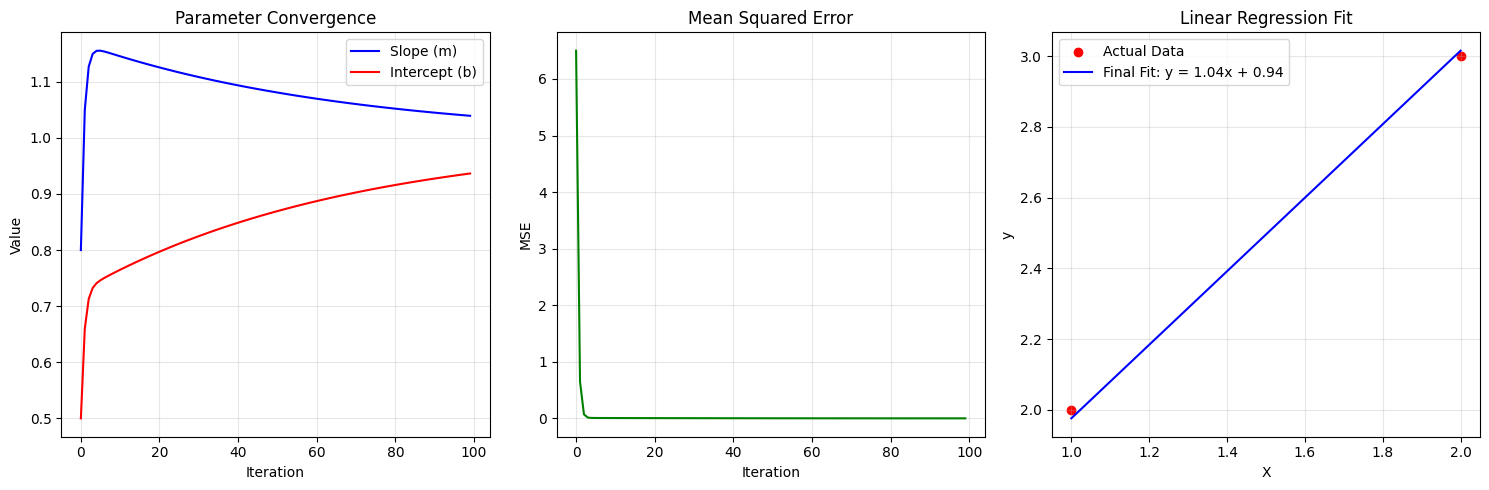

In [5]:
import numpy as np

# Data
X = np.array([1, 2])
y = np.array([2, 3])

# Initialize parameters
m, b = 0, 0
learning_rate = 0.1
n = len(X)
iterations = 100

# Track progress
history = {'m': [], 'b': [], 'error': []}

# Gradient Descent
for i in range(iterations):
    # Predictions
    y_pred = m * X + b
    
    # Compute error (MSE)
    error = np.mean((y_pred - y) ** 2)
    history['error'].append(error)
    
    # Gradients
    dm = (2/n) * np.sum(X * (y_pred - y))
    db = (2/n) * np.sum(y_pred - y)
    
    # Update parameters
    m -= learning_rate * dm
    b -= learning_rate * db
    
    # Store history
    history['m'].append(m)
    history['b'].append(b)

# Results
print(f"Final parameters after {iterations} iterations:")
print(f"Slope (m): {m:.4f}")
print(f"Intercept (b): {b:.4f}")
print(f"Final MSE: {history['error'][-1]:.6f}")

# Plotting
plt.figure(figsize=(15, 5))

# Parameter convergence
plt.subplot(1, 3, 1)
plt.plot(history['m'], 'b-', label='Slope (m)')
plt.plot(history['b'], 'r-', label='Intercept (b)')
plt.title('Parameter Convergence')
plt.xlabel('Iteration')
plt.ylabel('Value')
plt.legend()
plt.grid(alpha=0.3)

# Error convergence
plt.subplot(1, 3, 2)
plt.plot(history['error'], 'g-')
plt.title('Mean Squared Error')
plt.xlabel('Iteration')
plt.ylabel('MSE')
plt.grid(alpha=0.3)

# Final fit
plt.subplot(1, 3, 3)
plt.scatter(X, y, color='red', label='Actual Data')
plt.plot(X, m*X + b, 'b-', label=f'Final Fit: y = {m:.2f}x + {b:.2f}')
plt.title('Linear Regression Fit')
plt.xlabel('X')
plt.ylabel('y')
plt.legend()
plt.grid(alpha=0.3)

plt.tight_layout()
plt.show()

**Analysis:**
1. Parameters converge to near-optimal values (m≈1, b≈1)
2. MSE decreases rapidly in early iterations then stabilizes
3. Final regression line fits the data points well

**Key Observations:**
- Learning rate (0.1) provides stable convergence
- After ~20 iterations, parameters change minimally
- Demonstrates how gradient descent minimizes error step-by-step

## Conclusion

This notebook has demonstrated:
1. **Probability Distributions:** Implemented normal distribution from scratch
2. **Bayesian Probability:** Applied to medical test interpretation
3. **Gradient Descent:** Manual calculations and Python implementation

**Group Contributions:**
- Member 1: Normal distribution implementation
- Member 2: Bayesian probability analysis
- Member 3: Gradient descent manual calculations
- Member 4: Python implementation and visualization